PAP

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

from AA import DataDownloader, AssetAllocation, HierarchicalRiskParity, DynamicBacktester

C:\Users\lalos\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\lalos\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
downloader = DataDownloader()

assets = ['AAPL', 'IBM', 'TSLA', 'GOOG', 'NVDA'] 
benchmark = '^GSPC'  
start_date = '2019-01-01'
end_date = '2023-12-31'
rf = .065
ff_factors_expectations = {'Mkt-RF': 0.05, 'SMB': 0.02, 'HML': 0.03, 'RF': 0.02}

asset_prices, benchmark_prices, ff_factors = downloader.download_data(start_date=start_date, end_date=end_date,
                                                                      assets=assets, benchmark=benchmark)

# Default limits for every asset (min 1% - max 100%):  boounds = tuple((0.01, 1) for _ in range(self.num_assets))
Asset_allocation = AssetAllocation(asset_prices=asset_prices, benchmark_prices=benchmark_prices, rf=rf, 
                                   ff_factors=ff_factors, ff_factors_expectations=ff_factors_expectations) 

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Set Black-Litterman Expectations (Optional) 

P = np.array([
    [1, 0, 0, -1, 0],  
    [0, 1, -1, 0, 0],
    [0, 0, 0, 0, 1],
])

Q = np.array([0.05,  
              0.03,
              -0.15])  

Omega = np.diag([0.1**2, 0.15**2, 0.08**2])  
tau = 0.08  

Asset_allocation.set_blacklitterman_expectations(P, Q, tau, Omega)

In [6]:
Asset_allocation.Optimize_Portfolio(n_simulations = 10000) #Default Method == "Montecarlo"

,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.157309,0.010275,0.046457,0.516830,0.269128,1.267227
Max (Smart) Sharpe,0.030464,0.028149,0.017281,0.544556,0.379550,1.195781
Max Omega,0.341361,0.031967,0.315943,0.234371,0.076358,1.347527
Max (Smart) Omega,0.019702,0.016685,0.024434,0.209593,0.729586,1.202195
Min VaR (Empirical),0.043433,0.023112,0.021334,0.010704,0.901416,-0.056229
Min VaR (Parametric),0.087692,0.238559,0.622612,0.027914,0.023223,-0.024611
Semivariance,0.063535,0.280318,0.630581,0.014503,0.011062,0.000222
Safety-First,0.197213,0.020316,0.011328,0.500054,0.271089,0.079856
Max Sortino,0.019912,0.015062,0.017456,0.663737,0.283833,0.115377
Risk Parity,0.010301,0.067792,0.026897,0.017478,0.877532,0.001005


In [4]:
Asset_allocation.Optimize_Portfolio(method = "SLSQP") 

,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.212822,0.010000,0.010000,0.507455,0.259723,1.269909
Max (Smart) Sharpe,0.010000,0.010000,0.010000,0.569683,0.400317,1.200539
Max Omega,0.367591,0.018849,0.313470,0.213551,0.086539,1.348117
Max (Smart) Omega,0.010000,0.010000,0.201546,0.125314,0.653139,1.205929
Min VaR (Empirical),0.010000,0.010000,0.010000,0.389211,0.580789,-0.049680
Min VaR (Parametric),0.156482,0.217159,0.606359,0.010000,0.010000,-0.024424
Semivariance,0.200000,0.200000,0.200000,0.200000,0.200000,0.000401
Safety-First,0.221457,0.010000,0.010000,0.501680,0.256863,0.079996
Max Sortino,0.010000,0.010000,0.010000,0.747532,0.222468,0.115912
Risk Parity,0.200000,0.200000,0.200000,0.200000,0.200000,0.000014


In [7]:
Asset_allocation.Optimize_Portfolio(method = "Genetic", population_size=100, generations=200, crossover_rate=0.7, mutation_rate=0.1)

,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.221611,0.020676,0.059297,0.329499,0.368918,1.242613
Max (Smart) Sharpe,0.060225,0.014153,0.068735,0.465274,0.391613,1.249556
Max Omega,0.264089,0.145964,0.261614,0.212753,0.115580,1.336694
Max (Smart) Omega,0.041765,0.033514,0.287516,0.130064,0.507142,1.240236
Min VaR (Empirical),0.041279,0.026270,0.054675,0.402464,0.475312,-0.047292
Min VaR (Parametric),0.069070,0.242971,0.568432,0.013896,0.105630,-0.024588
Semivariance,0.203529,0.280842,0.227031,0.100561,0.188037,0.000346
Safety-First,0.289061,0.008056,0.105292,0.361062,0.236529,0.079156
Max Sortino,0.024488,0.029203,0.070295,0.593943,0.282070,0.113834
Risk Parity,0.022713,0.029411,0.010534,0.022707,0.914636,0.001097


In [8]:
Asset_allocation.Optimize_Portfolio(method = "Gradient", learning_rate=0.01, max_iters=1000, tol=1e-6)

,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.248382,0.009941,0.105160,0.386120,0.250397,1.258846
Max (Smart) Sharpe,0.169676,0.009953,0.079294,0.398525,0.342552,1.254626
Max Omega,0.343760,0.031759,0.318264,0.218558,0.087660,1.347933
Max (Smart) Omega,0.009988,0.009988,0.238969,0.176547,0.564508,1.238831
Min VaR (Empirical),0.199397,0.201444,0.199150,0.196247,0.203763,-0.035712
Min VaR (Parametric),0.255781,0.282329,0.441872,0.010009,0.010009,-0.022531
Semivariance,0.200001,0.200002,0.200005,0.199997,0.199995,0.000401
Safety-First,0.218456,0.079268,0.141724,0.316454,0.244097,0.077620
Max Sortino,0.231154,0.029324,0.061046,0.413851,0.264625,0.112007
Risk Parity,0.199999,0.199999,0.199999,0.200001,0.200002,0.000014


[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

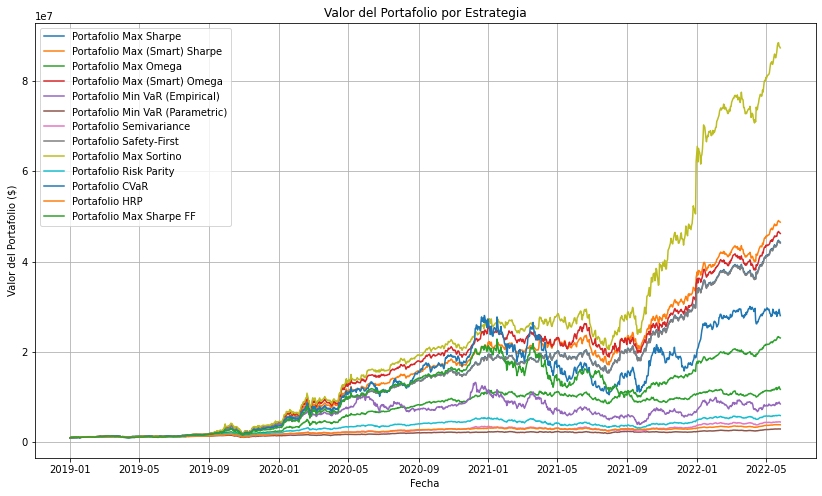

In [5]:
Backtest = DynamicBacktester(start_date, end_date, assets, benchmark, initial_capital=1_000_000,
                             strategies=["Max Sharpe", "Max (Smart) Sharpe", "Max Omega", "Max (Smart) Omega", "Min VaR (Empirical)", "Min VaR (Parametric)",
                                         "Semivariance", "Safety-First","Max Sortino","Risk Parity","CVaR", "HRP", "Max Sharpe FF"],
                             rf=rf, ff_factors_expectations=ff_factors_expectations, method = 'SLSQP')

Backtest.run_backtest()

-----

-------

--------------

----------